In [ ]:
!pip install praw
!pip install vaderSentiment
!pip install wordcloud

import praw
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 8.3 MB/s eta 0:00:00


In [ ]:
# Initialize Reddit API
def initialize_reddit():
    return praw.Reddit(
        client_id="sH_c6KINDb_8pN1IuQktdw",
        client_secret="x1mq8c7y16BQpYWUaOfdS6yQC-qwtg",
        user_agent="Stock_Sentiment_Project"

    )



In [ ]:
# Fetch Reddit posts
def fetch_reddit_posts(reddit, keywords, limit=100):
    posts = []
    for keyword in keywords:
        for submission in reddit.subreddit('all').search(keyword, limit=limit):
            posts.append({
                'company': keyword,
                'title': submission.title,
                'selftext': submission.selftext,
                'score': submission.score
            })
    return pd.DataFrame(posts)



In [ ]:
# Perform sentiment analysis
def analyze_sentiment(posts_df):
    analyzer = SentimentIntensityAnalyzer()
    posts_df['full_text'] = posts_df['title'] + " " + posts_df['selftext']
    posts_df['sentiment_score'] = posts_df['full_text'].apply(
        lambda text: analyzer.polarity_scores(text)['compound']
    )
    return posts_df



In [ ]:
# Aggregate sentiment scores
def aggregate_sentiments(posts_df):
    grouped = posts_df.groupby('company').agg(
        avg_sentiment=('sentiment_score', 'mean'),
        post_count=('sentiment_score', 'count')
    ).reset_index()
    return grouped.sort_values(by='avg_sentiment', ascending=False)



In [ ]:
# Get top positive and negative companies
def get_top_companies(aggregated_df, top_n=5):
    top_positive = aggregated_df.head(top_n)
    top_negative = aggregated_df.tail(top_n)
    return top_positive, top_negative



In [ ]:
# Generate sentiment word clouds (optional for future)
def generate_word_clouds(posts_df):
    from wordcloud import WordCloud
    import matplotlib.pyplot as plt

    positive_text = " ".join(posts_df[posts_df['sentiment_score'] > 0]['full_text'])
    negative_text = " ".join(posts_df[posts_df['sentiment_score'] < 0]['full_text'])

    # Positive word cloud
    wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_positive, interpolation='bilinear')
    plt.axis('off')
    plt.title("Positive Sentiment Word Cloud")
    plt.show()

    # Negative word cloud
    wordcloud_negative = WordCloud(width=800, height=400, background_color='black').generate(negative_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_negative, interpolation='bilinear')
    plt.axis('off')
    plt.title("Negative Sentiment Word Cloud")
    plt.show()



In [ ]:
# Identify companies likely to do well
def identify_promising_companies(aggregated_df, threshold=0.2):
    promising_companies = aggregated_df[aggregated_df['avg_sentiment'] > threshold]
    return promising_companies


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching Reddit posts...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Analyzing sentiment...
Aggregating sentiment scores...
Getting top companies...
Top Positive Companies:
     company  avg_sentiment  post_count
0     Amazon       0.146410         100
2     Google       0.071532         100
1      Apple       0.041835         100
3  Microsoft      -0.047239         100
4      Tesla      -0.151399         100
Top Negative Companies:
     company  avg_sentiment  post_count
0     Amazon       0.146410         100
2     Google       0.071532         100
1      Apple       0.041835         100
3  Microsoft      -0.047239         100
4      Tesla      -0.151399         100
Identifying promising companies...
Companies likely to do well in the stock market:
Empty DataFrame
Columns: [company, avg_sentiment, post_count]
Index: []


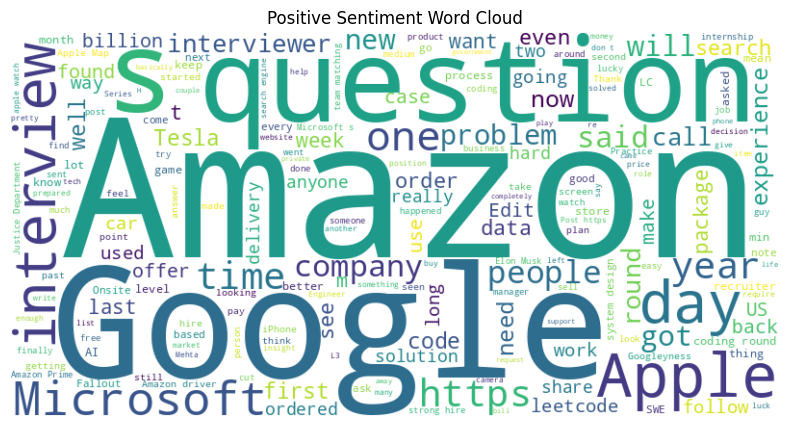

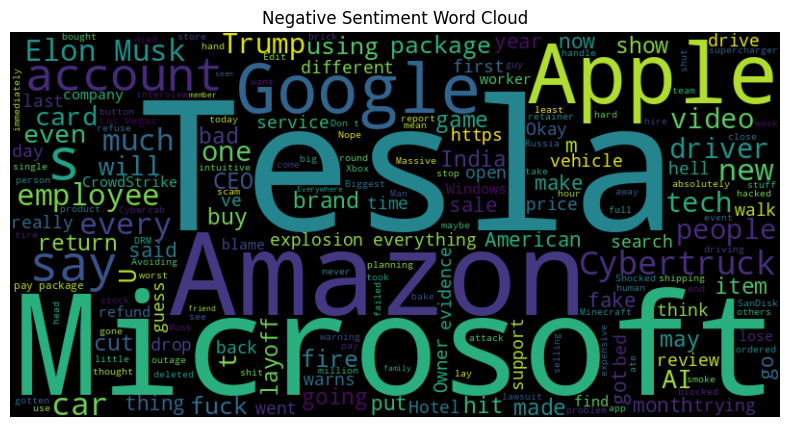

Sentiment analysis completed.


In [ ]:
def main():
    reddit = initialize_reddit()
    keywords = ['Tesla', 'Apple', 'Google', 'Microsoft', 'Amazon']  # Example companies
    print("Fetching Reddit posts...")
    posts_df = fetch_reddit_posts(reddit, keywords)

    print("Analyzing sentiment...")
    posts_df = analyze_sentiment(posts_df)

    print("Aggregating sentiment scores...")
    aggregated_df = aggregate_sentiments(posts_df)

    print("Getting top companies...")
    top_positive, top_negative = get_top_companies(aggregated_df)

    print("Top Positive Companies:")
    print(top_positive)

    print("Top Negative Companies:")
    print(top_negative)

    print("Identifying promising companies...")
    promising_companies = identify_promising_companies(aggregated_df)

    print("Companies likely to do well in the stock market:")
    print(promising_companies[['company', 'avg_sentiment', 'post_count']])

    # Uncomment below line to generate word clouds later
    generate_word_clouds(posts_df)

    print("Sentiment analysis completed.")


if __name__ == "__main__":
    main()
